# EDA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions import *


# Import necessary transformers
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
original_data=pd.read_csv('data_models\credit_risk_dataset.csv')

In [76]:
original_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [66]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Target distribution

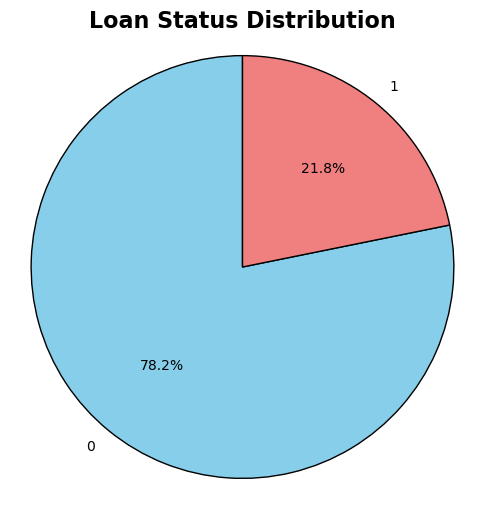

In [62]:
counts = original_data['loan_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
plt.title('Loan Status Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio to make the pie circular
plt.show()



## Boxplot of numerical features

In [5]:
# Get numeric columns
numeric_columns = original_data.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_columns)

8

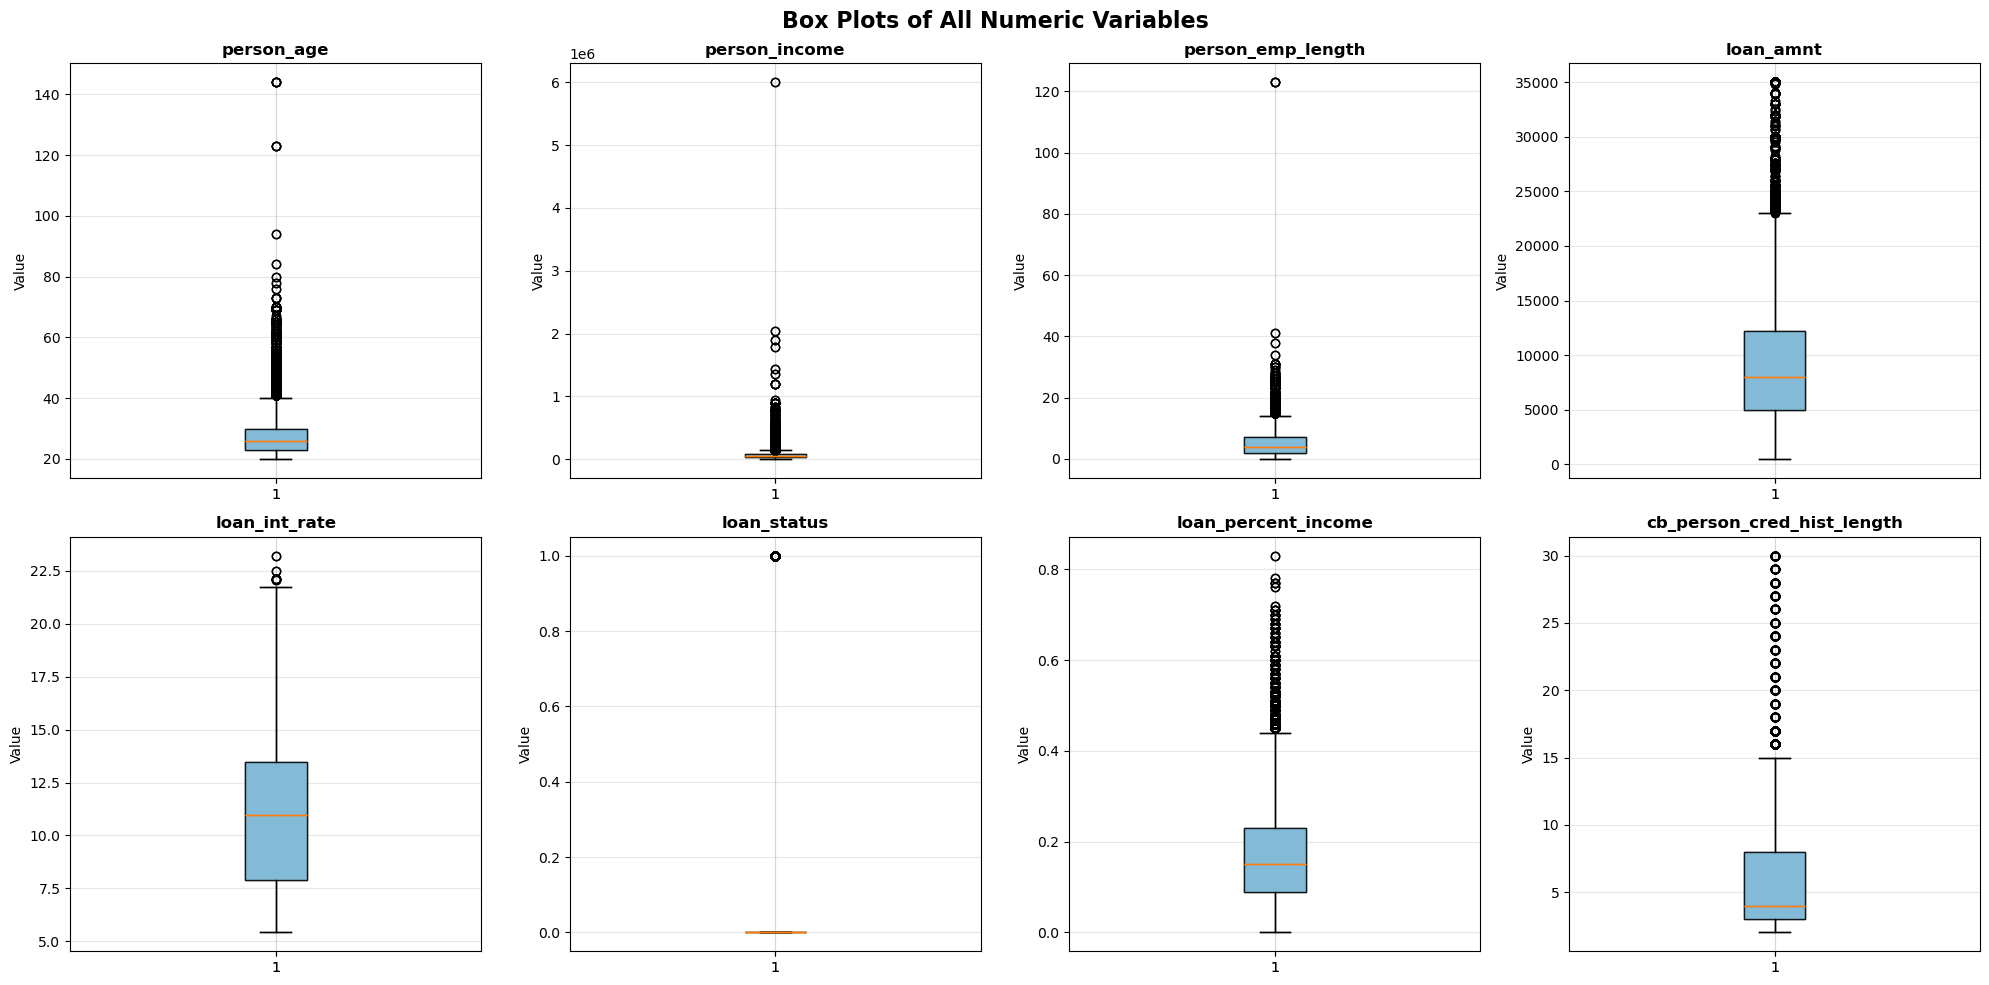

In [64]:
# Create box plots for all numeric variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Box Plots of All Numeric Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(original_data[col].dropna(), patch_artist=True)
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)
        
        # Add some styling
        bp = axes[i].boxplot(original_data[col].dropna(), patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

histograms of variables with extreme outliers

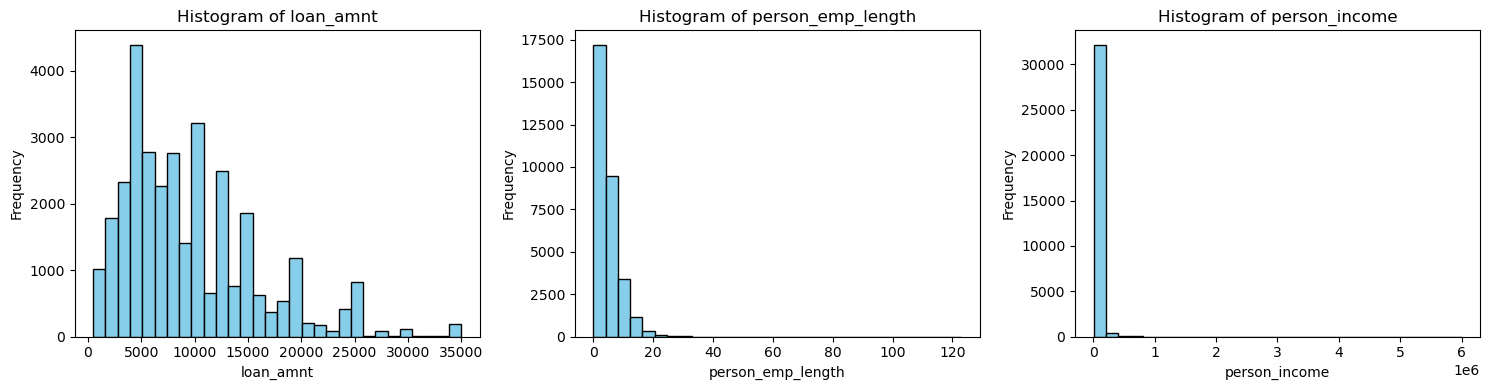

In [65]:
lt = ['loan_amnt', 'person_emp_length', 'person_income']

# Set up the plot
plt.figure(figsize=(15, 4))

for i, col in enumerate(lt):
    plt.subplot(1, 3, i + 1)
    plt.hist(original_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
mask = (
    (original_data['person_age'] > 85) |
    (original_data['person_income'] > 1000000) |
    (original_data['person_emp_length'] > 50)
)
data=original_data[~mask]

## Distributions

In [8]:
# Calculate kurtosis and skewness for each variable in the dataset
kurtosis = data.kurtosis(numeric_only=True)
skewness = data.skew(numeric_only=True)

# Combine into a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Kurtosis': kurtosis,
    'Skewness': skewness
})

print(stats_df)

                             Kurtosis  Skewness
person_age                   5.528347  1.915467
person_income               59.766420  5.312973
person_emp_length            2.417567  1.248112
loan_amnt                    1.421046  1.191892
loan_int_rate               -0.671362  0.208582
loan_status                 -0.138569  1.364346
loan_percent_income          1.222235  1.064813
cb_person_cred_hist_length   3.682929  1.656037


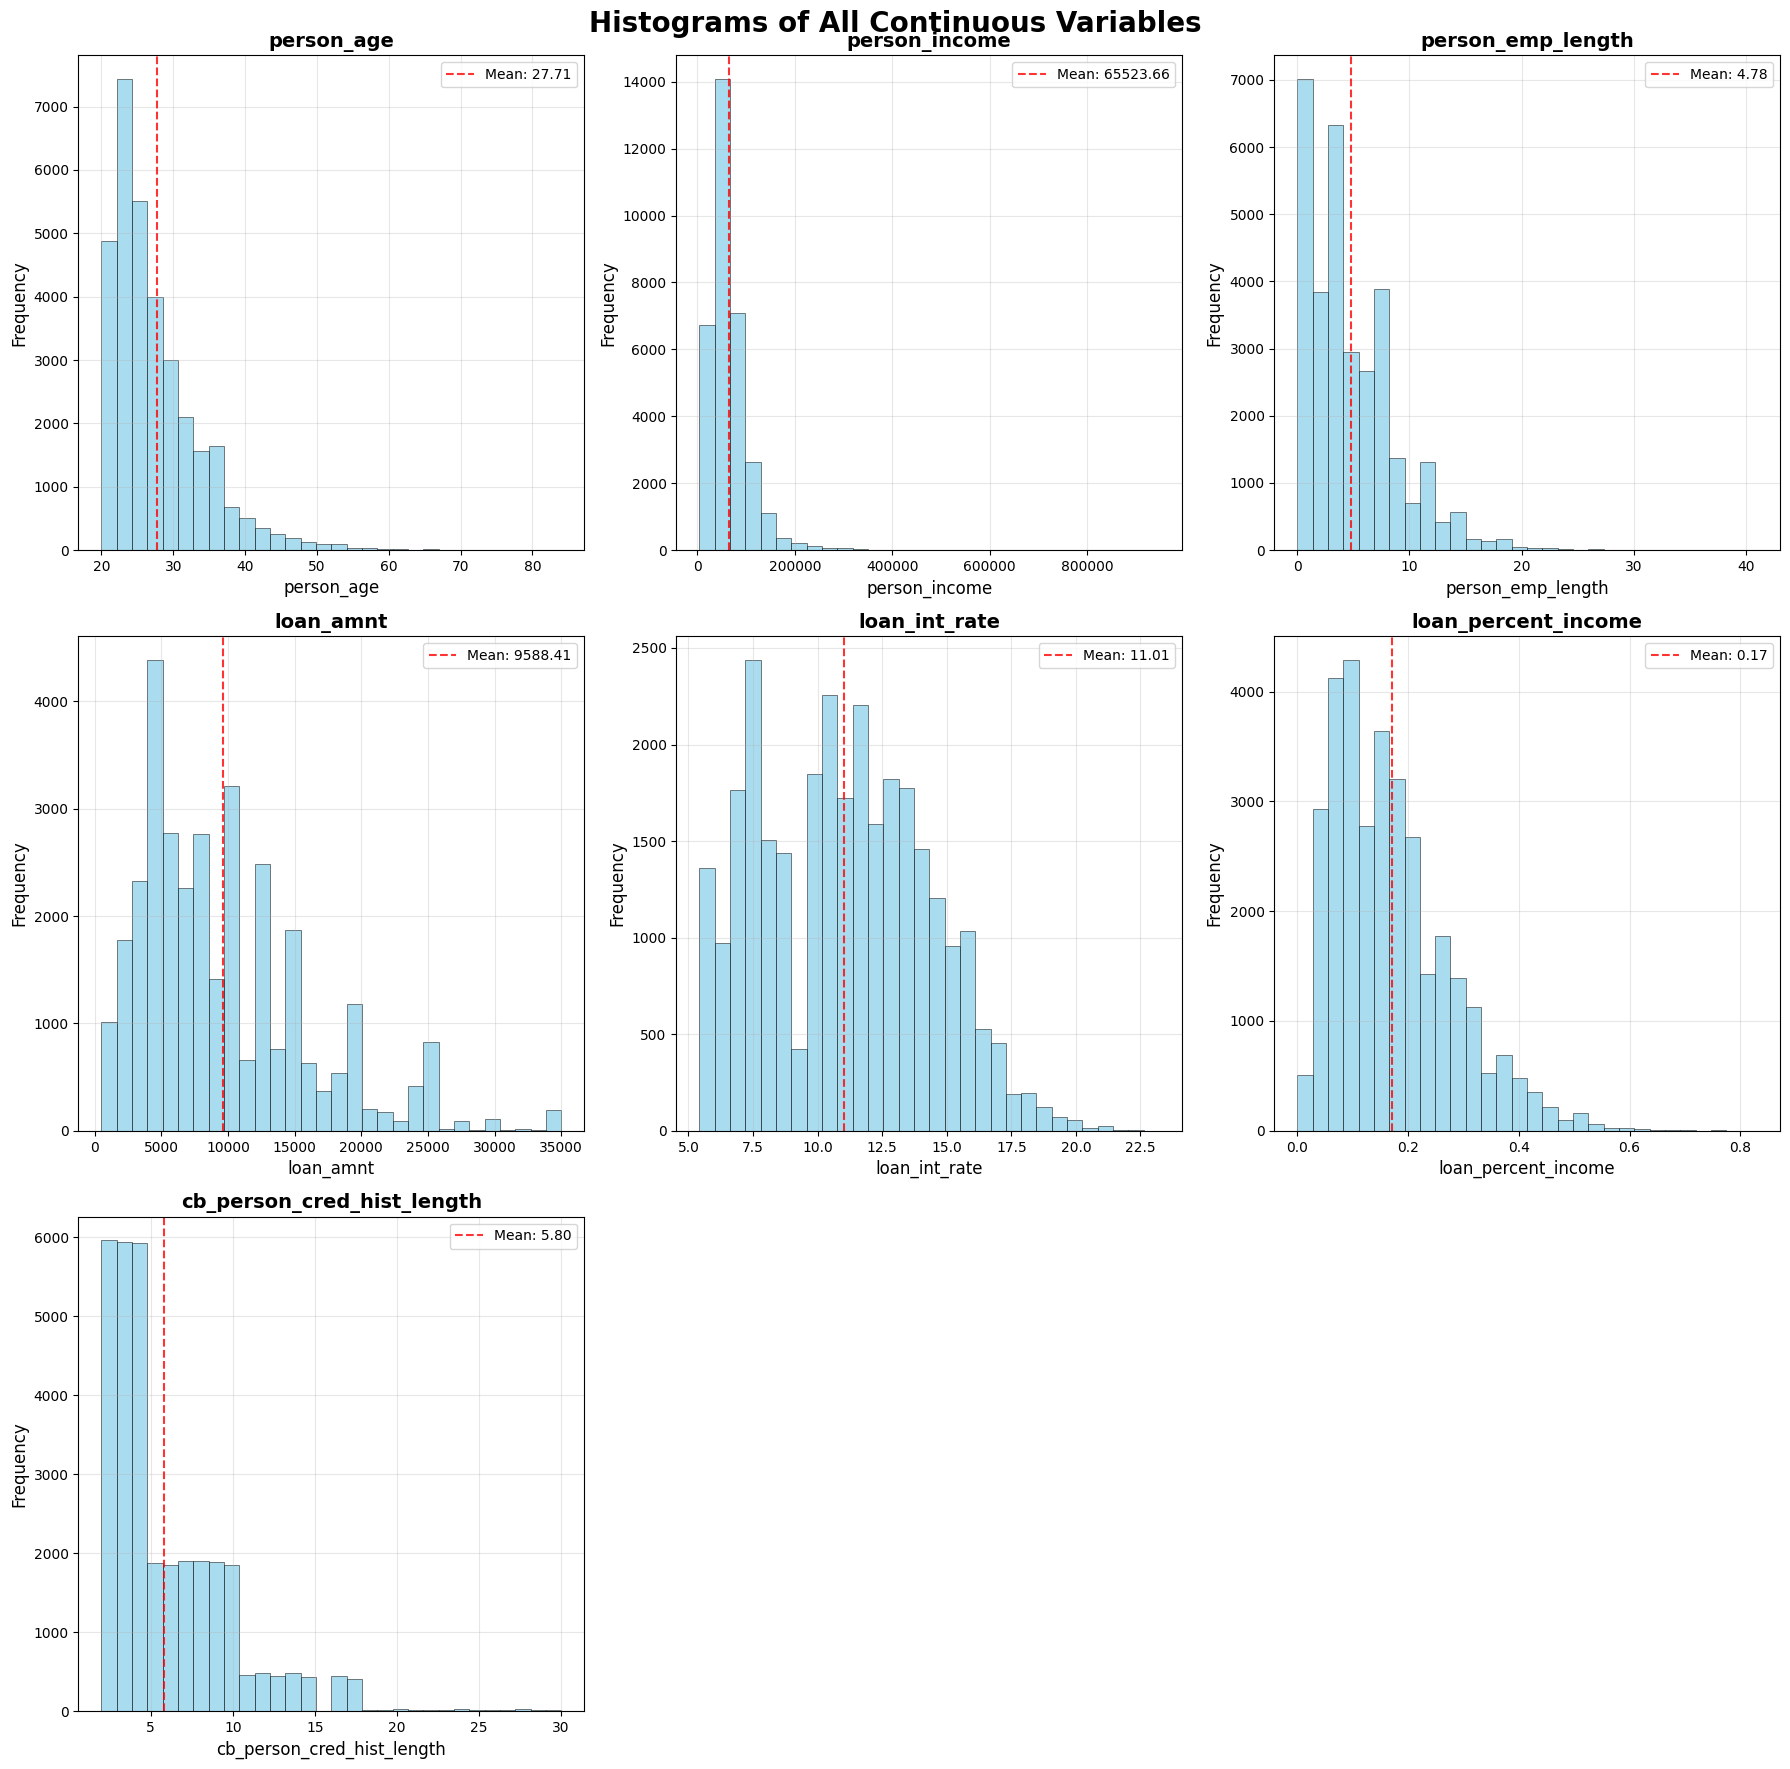

In [14]:
# Histograms for all continuous variables
continuous_vars = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Create subplots for continuous variables
n_vars = len(continuous_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))
fig.suptitle('Histograms of All Continuous Variables', fontsize=20, fontweight='bold', y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    # Handle missing values
    var_data = data[var].dropna()
    
    axes[i].hist(var_data, bins=30, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[i].set_title(f'{var}', fontweight='bold', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = var_data.mean()
    std_val = var_data.std()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

# Hide unused subplots
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [25]:
data.min()

person_age                                   20
person_income                              4000
person_home_ownership                  MORTGAGE
person_emp_length                           0.0
loan_intent                   DEBTCONSOLIDATION
loan_grade                                    A
loan_amnt                                   500
loan_int_rate                              5.42
loan_status                                   0
loan_percent_income                         0.0
cb_person_default_on_file                     N
cb_person_cred_hist_length                    2
dtype: object

In [13]:
data['loan_amnt']=np.log(data['loan_amnt'])
data['person_income']=np.log(data['person_income'])
data['loan_percent_income']=np.log1p(data['loan_percent_income'])
data['person_age']=np.log(np.log(data['person_age']))
data['cb_person_cred_hist_length']=np.log(data['cb_person_cred_hist_length'])
data['person_emp_length']=np.log1p(data['person_emp_length'])

In [40]:
data.min()

person_age                             1.097189
person_income                           8.29405
person_home_ownership                  MORTGAGE
person_emp_length                           0.0
loan_intent                   DEBTCONSOLIDATION
loan_grade                                    A
loan_amnt                              6.214608
loan_int_rate                              5.42
loan_status                                   0
loan_percent_income                         0.0
cb_person_default_on_file                     N
cb_person_cred_hist_length             0.693147
dtype: object

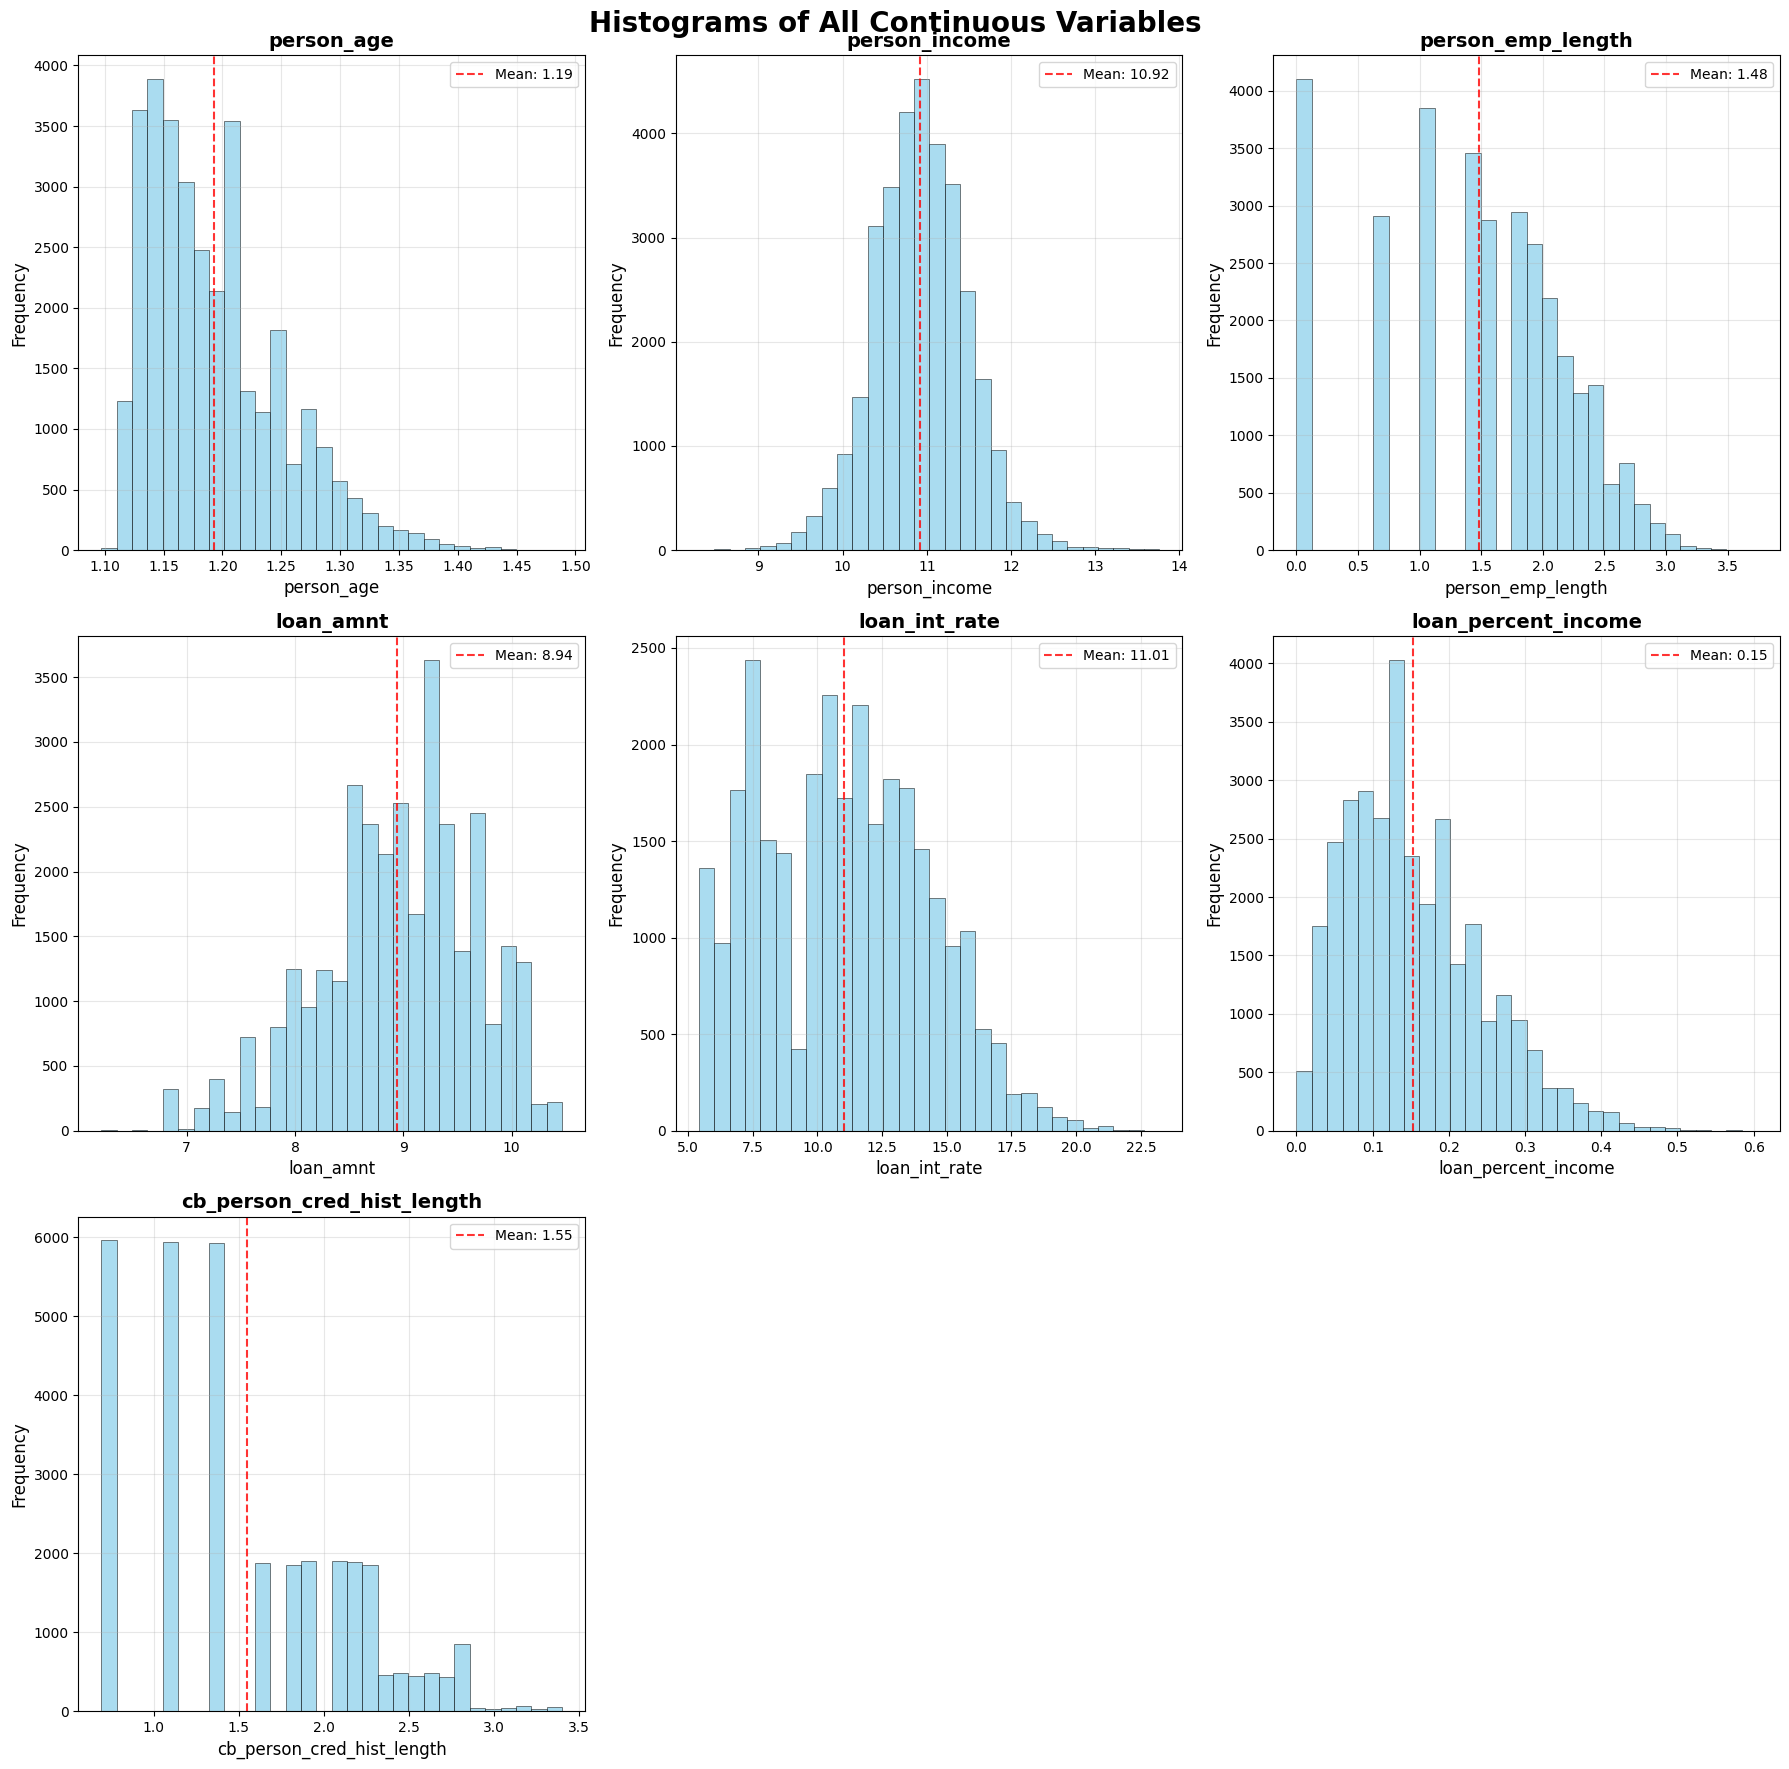

In [41]:
# Create subplots for continuous variables
n_vars = len(continuous_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))
fig.suptitle('Histograms of All Continuous Variables', fontsize=20, fontweight='bold', y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    # Handle missing values
    var_data = data[var].dropna()
    
    axes[i].hist(var_data, bins=30, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[i].set_title(f'{var}', fontweight='bold', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = var_data.mean()
    std_val = var_data.std()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

# Hide unused subplots
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
# Calculate kurtosis and skewness for each variable in the dataset
kurtosis = data.kurtosis(numeric_only=True)
skewness = data.skew(numeric_only=True)

# Combine into a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Kurtosis': kurtosis,
    'Skewness': skewness
})

print(stats_df)

                            Kurtosis  Skewness
person_age                  0.772103  0.989095
person_income               0.880662 -0.125875
person_emp_length          -0.564487 -0.458691
loan_amnt                   0.371688 -0.674556
loan_int_rate              -0.671362  0.208582
loan_status                -0.138569  1.364346
loan_percent_income         0.420097  0.817757
cb_person_cred_hist_length -0.833109  0.328657


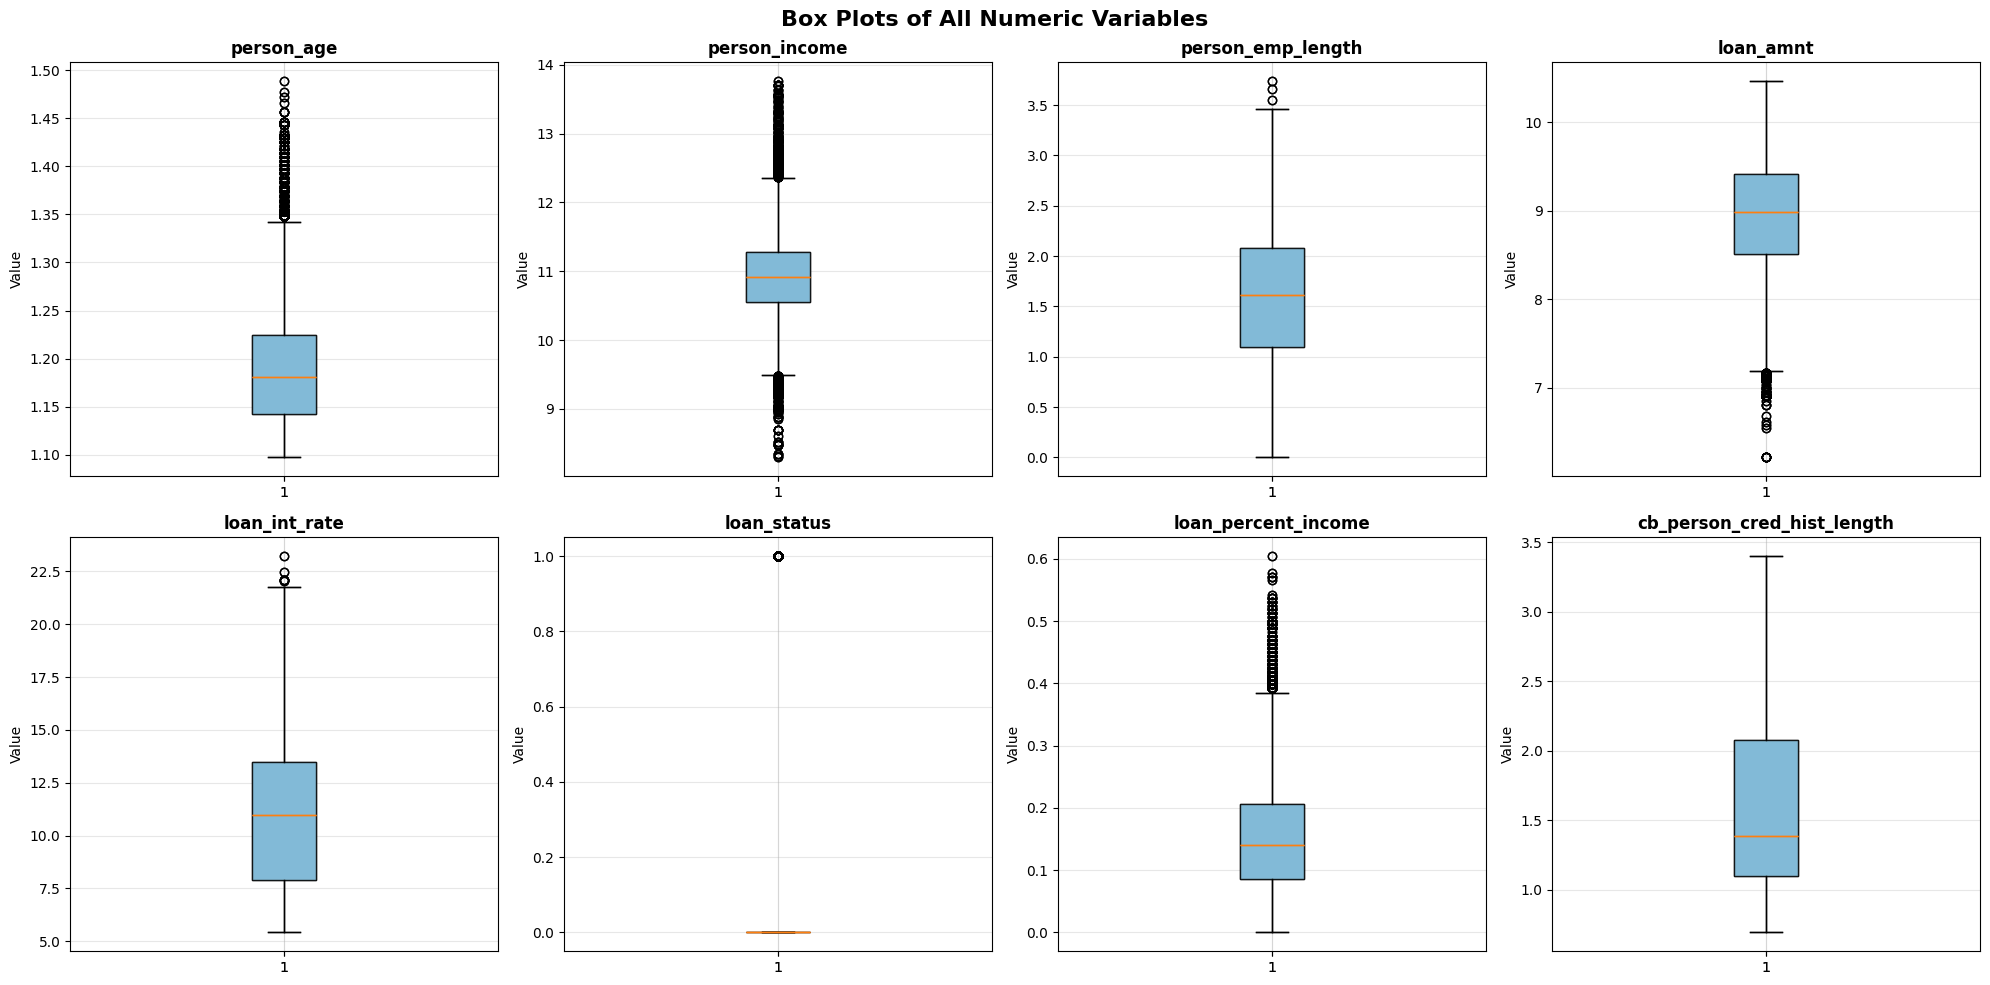

In [44]:
# Create box plots for all numeric variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Box Plots of All Numeric Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(data[col].dropna(), patch_artist=True)
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)
        
        # Add some styling
        bp = axes[i].boxplot(data[col].dropna(), patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## outliers distribution

person_age
Upper bound: 1.346138642311697
Number of outliers: 549


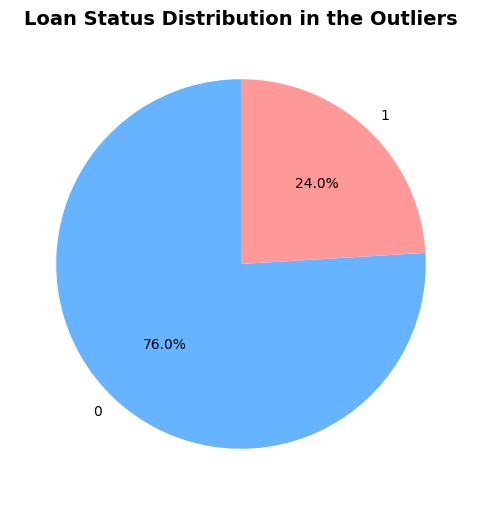

person_income
Upper bound: 12.361708664092479
Number of outliers: 568


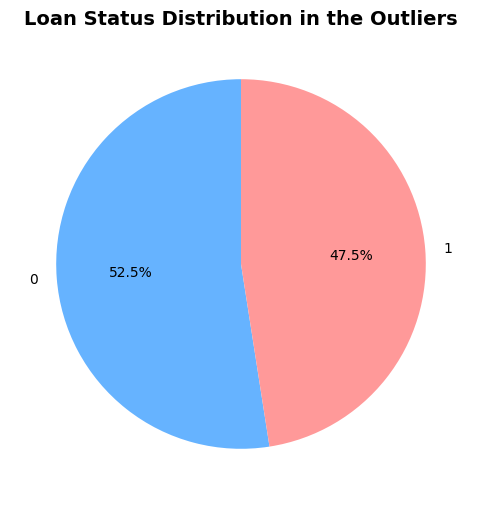

person_emp_length
Upper bound: 3.5506854211974246
Number of outliers: 3


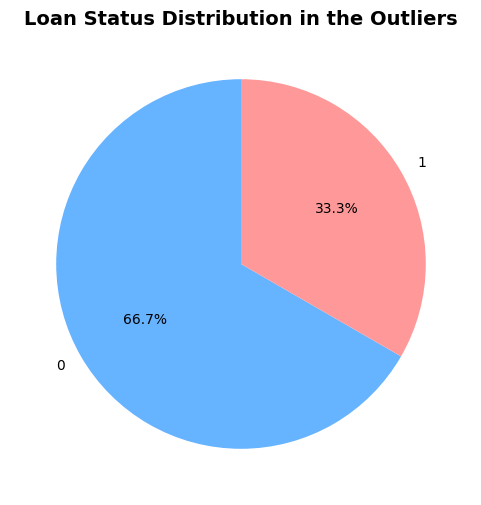

loan_amnt
Upper bound: 10.747188289679013
Number of outliers: 516


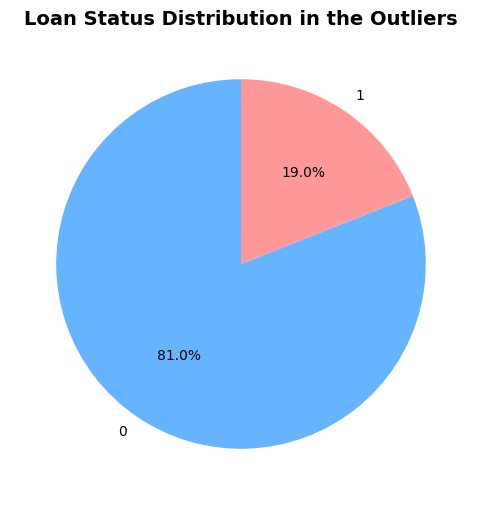

loan_int_rate
Upper bound: 21.825000000000003
Number of outliers: 6


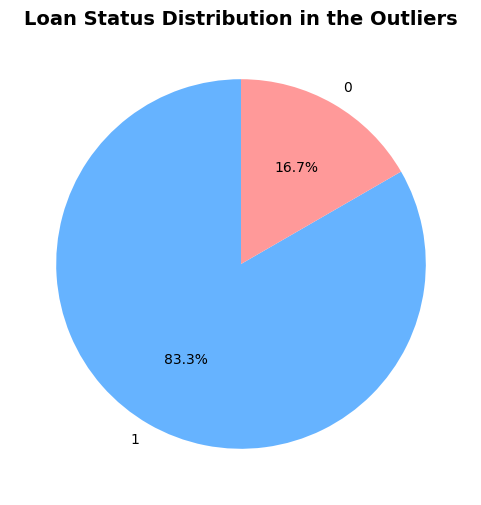

loan_percent_income
Upper bound: 0.3882688790992369
Number of outliers: 435


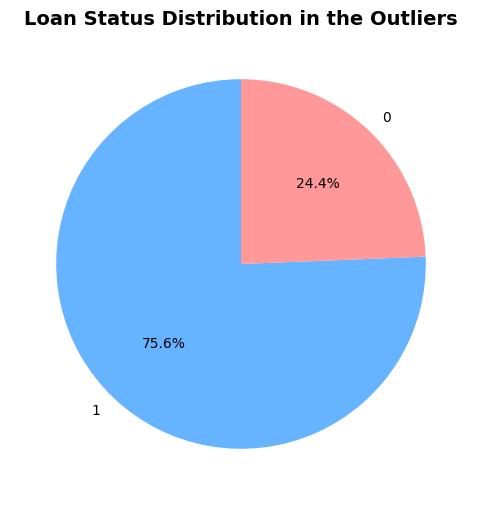

In [8]:
for i in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income']:
    print(i)
    plot_loan_status_outliers(data, i , status_col='loan_status')

outliers with similar target distribution:
If the outliers have a target variable distribution similar to the whole dataset, it means these outliers are representative of the overall data pattern.
So keeping them is reasonable — they provide valid information and won't bias your model.

clients outliers with different target distribution:
If the outliers for rich clients show a target distribution significantly different from the overall dataset, it means these samples may behave differently or represent a distinct subgroup.
Removing or treating them differently can help your model avoid bias or overfitting on a small but different subset.

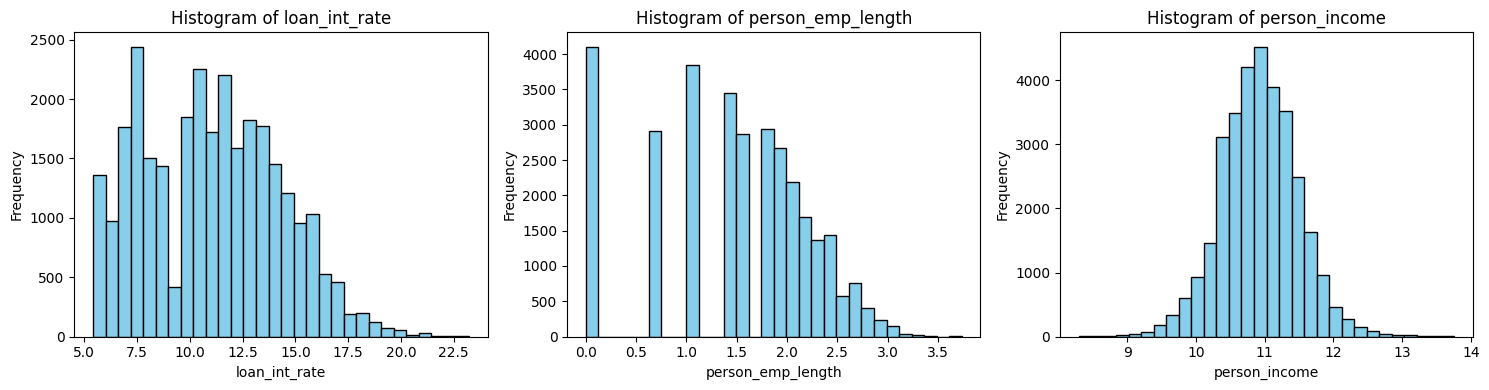

In [6]:
lt = ['loan_int_rate', 'person_emp_length', 'person_income']

# Set up the plot
plt.figure(figsize=(15, 4))

for i, col in enumerate(lt):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

removing more outliers and transformations

In [14]:
mask = (
    (data['person_income'] <  9.476) |
    (data['person_income'] > 12.361) )
data=data[~mask]

## categorical variables

In [19]:
# Get categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
len(categorical_columns)

4

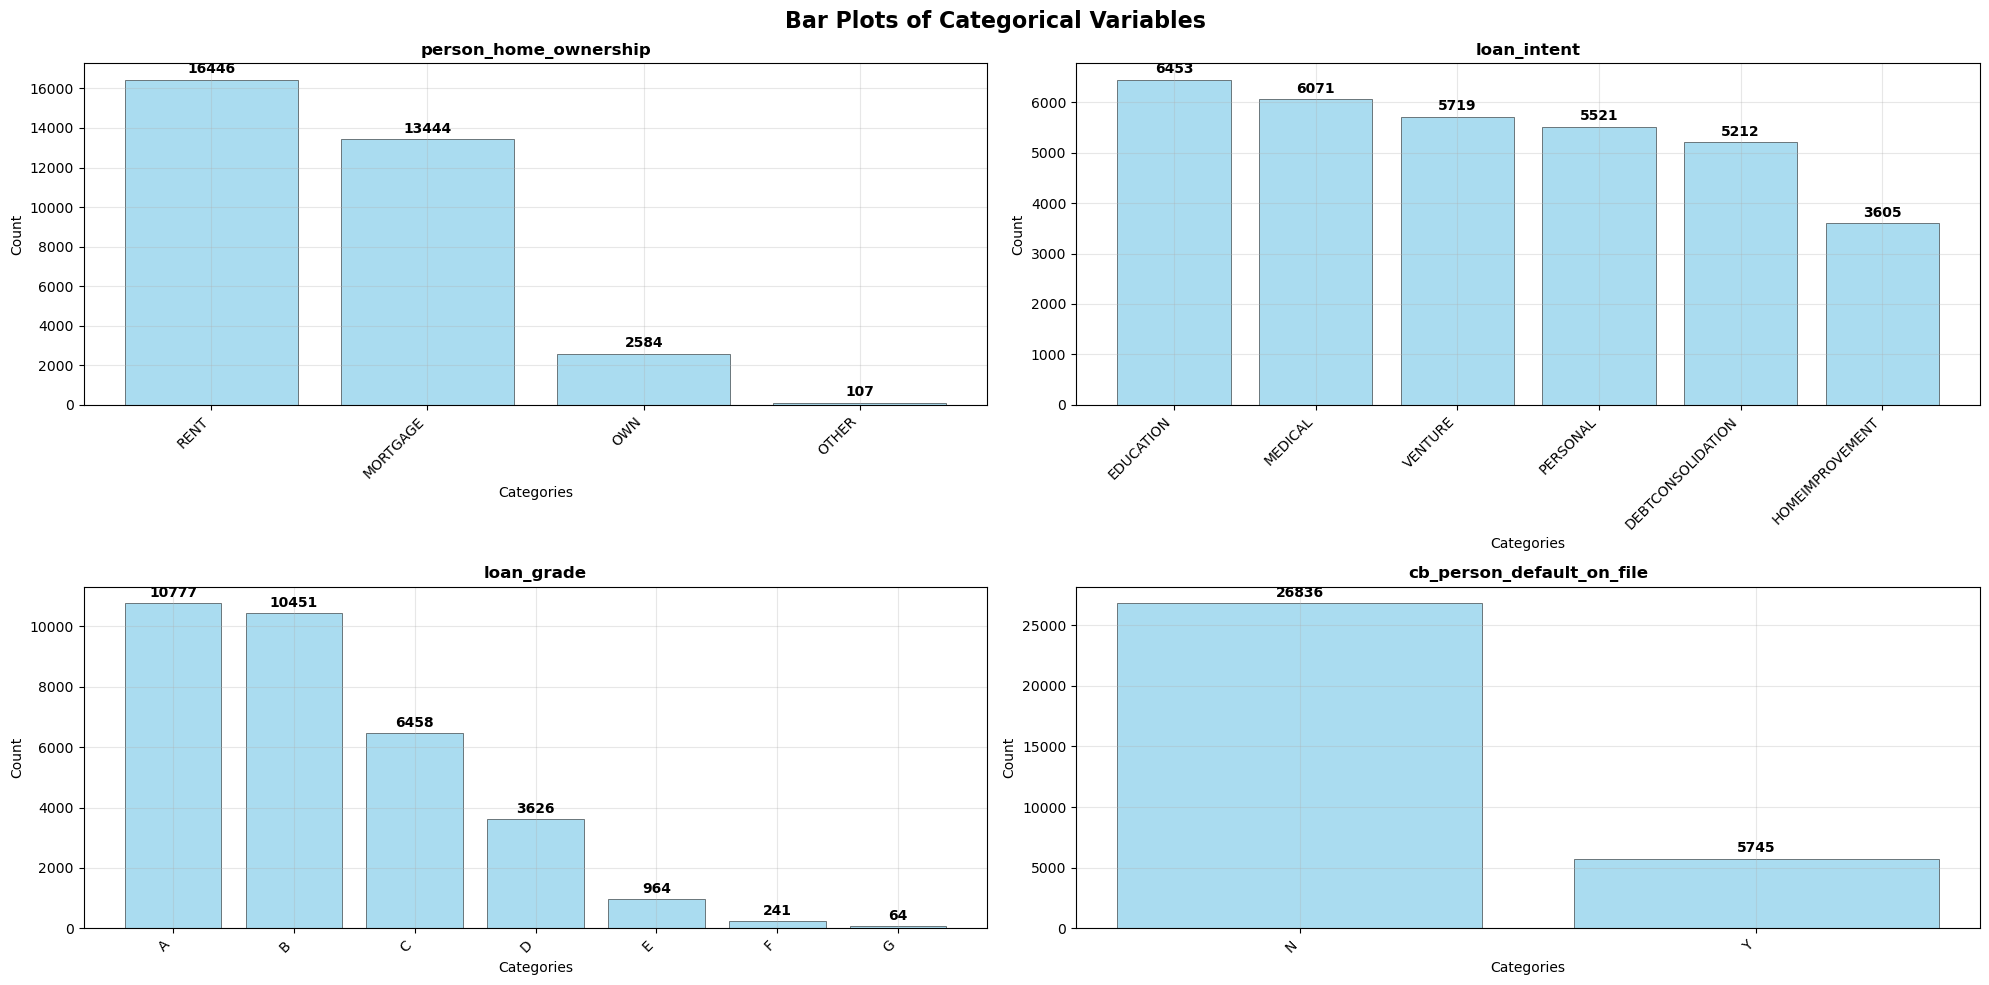

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Bar Plots of Categorical Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()
    
for i, col in enumerate(categorical_columns):
        if i < len(axes):
            # Count values and plot
            value_counts = data[col].value_counts()
            axes[i].bar(range(len(value_counts)), value_counts.values, 
                       color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
            axes[i].set_title(f'{col}', fontweight='bold', fontsize=12)
            axes[i].set_xlabel('Categories')
            axes[i].set_ylabel('Count')
            axes[i].grid(True, alpha=0.3)
            
            # Set x-axis labels
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            
            # Add value labels on bars
            for j, v in enumerate(value_counts.values):
                axes[i].text(j, v + max(value_counts.values)*0.01, str(v), 
                           ha='center', va='bottom', fontweight='bold')
    
    # Hide unused subplots
for i in range(len(categorical_columns), len(axes)):
        axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

Note: loan grades ordinal data

In [41]:
print(pd.crosstab(data['person_home_ownership'], [data['loan_status'], data['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [42]:
print(pd.crosstab(data['cb_person_default_on_file'], [data['loan_status'], data['loan_grade']]))

loan_status                   0                                  1             \
loan_grade                    A     B     C    D    E   F  G     A     B    C   
cb_person_default_on_file                                                       
N                          9704  8750  2504  736  169  37  0  1073  1701  698   
Y                             0     0  2615  749  174  34  1     0     0  641   

loan_status                                   
loan_grade                    D    E   F   G  
cb_person_default_on_file                     
N                          1014  330  92  28  
Y                          1127  291  78  35  


## Extras Normalizing Distributions

The current distributions are not normal. Let's try different transformation techniques:

1. **Box-Cox Transformation** - Good for positive skewed data
2. **Yeo-Johnson Transformation** - Works with negative values too
3. **Quantile Transformation** - Maps to uniform or normal distribution
4. **Log Transformation** - For right-skewed data (if all values > 0)
5. **Square Root Transformation** - For moderately skewed data

In [15]:
# Variables to transform
vars_to_transform = ['person_age', 'person_emp_length', 'cb_person_cred_hist_length']

print("Original distribution statistics:")
for var in vars_to_transform:
    skewness = stats.skew(data[var].dropna())
    kurtosis = stats.kurtosis(data[var].dropna())
    print(f"{var}: Skewness = {skewness:.3f}, Kurtosis = {kurtosis:.3f}")
print()

Original distribution statistics:
person_age: Skewness = 0.999, Kurtosis = 0.801
person_emp_length: Skewness = -0.464, Kurtosis = -0.554
cb_person_cred_hist_length: Skewness = 0.334, Kurtosis = -0.828



In [16]:
# First apply Yeo-Johnson transformation
yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
data_yj = data.copy()

for var in vars_to_transform:
    mask = data_yj[var].notna()
    data_yj.loc[mask, var] = yeo_johnson.fit_transform(data_yj.loc[mask, [var]]).flatten()

In [17]:
# Method 2: Quantile Transformation to Normal Distribution
quantile_normal = QuantileTransformer(output_distribution='normal', random_state=65)

data_qt = data.copy()
for var in vars_to_transform:
    mask = data_qt[var].notna()
    data_qt.loc[mask, var] = quantile_normal.fit_transform(data_qt.loc[mask, [var]]).flatten()


In [18]:
from scipy.stats.mstats import winsorize
data_wins = data.copy()
for var in vars_to_transform:
    data_wins[var] = winsorize(data[var], limits=[0.01, 0.01])  # cap bottom/top 1%

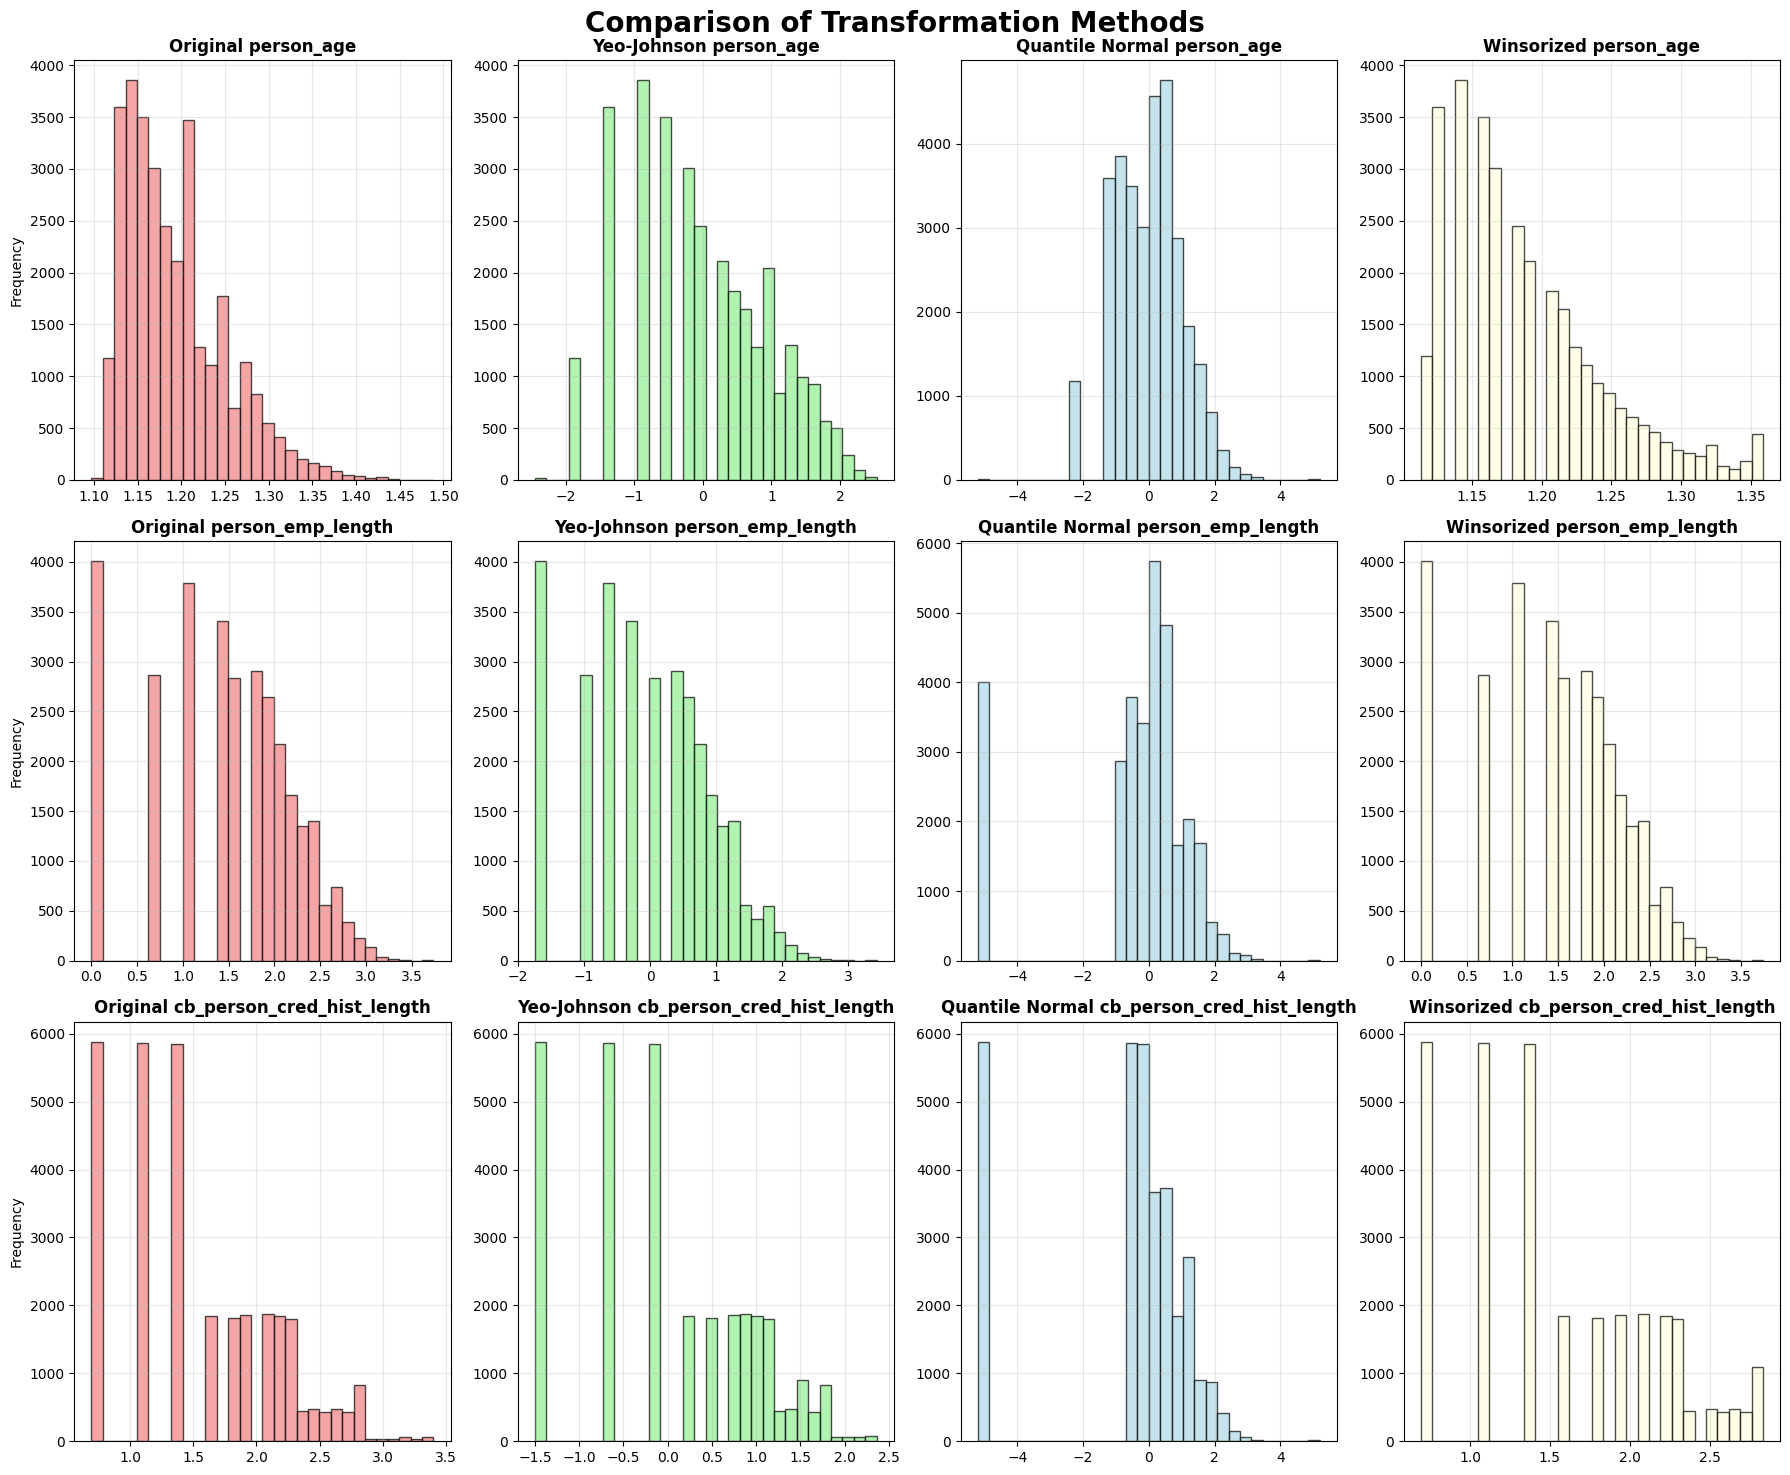

In [19]:
# Compare all transformations visually
fig, axes = plt.subplots(nrows=len(vars_to_transform), ncols=4, figsize=(18, 5*len(vars_to_transform)))
fig.suptitle('Comparison of Transformation Methods', fontsize=20, fontweight='bold')

for i, var in enumerate(vars_to_transform):
    # Original distribution
    axes[i, 0].hist(data[var].dropna(), bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(f'Original {var}', fontweight='bold')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Yeo-Johnson transformation
    axes[i, 1].hist(data_yj[var].dropna(), bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[i, 1].set_title(f'Yeo-Johnson {var}', fontweight='bold')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Quantile transformation
    axes[i, 2].hist(data_qt[var].dropna(), bins=30, color='lightblue', alpha=0.7, edgecolor='black')
    axes[i, 2].set_title(f'Quantile Normal {var}', fontweight='bold')
    axes[i, 2].grid(True, alpha=0.3)

    axes[i, 3].hist(data_wins[var].dropna(), bins=30, color='lightyellow', alpha=0.7, edgecolor='black')
    axes[i, 3].set_title(f'Winsorized {var}', fontweight='bold')
    axes[i, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()